<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Types-of-Violations" data-toc-modified-id="Types-of-Violations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Types of Violations</a></span></li><li><span><a href="#Place-Description-for-each-Violation-Type" data-toc-modified-id="Place-Description-for-each-Violation-Type-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Place Description for each Violation Type</a></span><ul class="toc-item"><li><span><a href="#Violation-in-Chain/Non-Chain-Places" data-toc-modified-id="Violation-in-Chain/Non-Chain-Places-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Violation in Chain/Non-Chain Places</a></span></li></ul></li><li><span><a href="#Restaurant's-Age-and-Violation-Type" data-toc-modified-id="Restaurant's-Age-and-Violation-Type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Restaurant's Age and Violation Type</a></span></li><li><span><a href="#Star-Reviews-and-Violation" data-toc-modified-id="Star-Reviews-and-Violation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Star Reviews and Violation</a></span></li><li><span><a href="#Reviews-Counts-and-Violations" data-toc-modified-id="Reviews-Counts-and-Violations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reviews Counts and Violations</a></span></li><li><span><a href="#Violations-by-Zip-Codes" data-toc-modified-id="Violations-by-Zip-Codes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Violations by Zip Codes</a></span></li><li><span><a href="#Violations-and-Yelp-Attributes" data-toc-modified-id="Violations-and-Yelp-Attributes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Violations and Yelp Attributes</a></span><ul class="toc-item"><li><span><a href="#Alcohol" data-toc-modified-id="Alcohol-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Alcohol</a></span></li><li><span><a href="#Good-For-Kids" data-toc-modified-id="Good-For-Kids-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Good For Kids</a></span></li><li><span><a href="#Price-Range" data-toc-modified-id="Price-Range-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Price Range</a></span></li></ul></li><li><span><a href="#Violations-and-Yelp-Categories" data-toc-modified-id="Violations-and-Yelp-Categories-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Violations and Yelp Categories</a></span><ul class="toc-item"><li><span><a href="#Cuisine" data-toc-modified-id="Cuisine-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Cuisine</a></span></li><li><span><a href="#Special-Food" data-toc-modified-id="Special-Food-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Special Food</a></span></li><li><span><a href="#Place" data-toc-modified-id="Place-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Place</a></span></li></ul></li><li><span><a href="#Statistical-Significance-of-the-Observed-Differences" data-toc-modified-id="Statistical-Significance-of-the-Observed-Differences-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Statistical Significance of the Observed Differences</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Numerical Features</a></span></li></ul></li><li><span><a href="#Do-restaurants-do-better-than-from-the-last-inspection?" data-toc-modified-id="Do-restaurants-do-better-than-from-the-last-inspection?-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Do restaurants do better than from the last inspection?</a></span></li><li><span><a href="#Sentiment-Analysis-of-Text-Reviews" data-toc-modified-id="Sentiment-Analysis-of-Text-Reviews-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Sentiment Analysis of Text Reviews</a></span></li><li><span><a href="#Topic-Modeling" data-toc-modified-id="Topic-Modeling-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Topic Modeling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

After having cleaned the violation and business datasets, we now explore how the information and attributes of the restaurants are associated with the type of violation detected during inspection of the restaurants.

The inspection and Yelp datasets provide several information about each restaurant, which includes: location, description of the place, starting business date, number of star reviews, total number of reviews, cuisine served, special food served and some characteristics of the place. The inspection dataset also includes inspection time and results (number of low, medium and high violations), and Yelp  dataset includes text reviews for each restaurant. By examining this information, we would like to know which features help in identifying the restaurants that are more likely to make a violation.

In particular, we analyze both datasets and examine if violations are changing across time and season, and if they are following any trends. Do they occur more in restaurants, grocery stores, food facilities in schools, or other places? Are there any differences in the number of violations between chain and non-chain restaurants? In which regions of Allegheny county, the violations are focused? How does the age of restaurants affect their inspection results? Do old restaurants follow regulations more thoroughly? How do popular, high star review and expensive restaurants perform in terms of hygiene? In which cuisine, do violations occur more? Do restaurants with high number of violations serve a specific type of food? Can text reviews help in identifying any possible violation? In this report, we address those questions to gain more insight about the circumstances of each type of violations.

# Loading the data

We first import the required modules and load the clean data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt
import geoplot.crs as gcrs
from pingouin import welch_anova
from scipy.stats import spearmanr
from afinn import Afinn
from dateutil.relativedelta import relativedelta
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
data = pd.read_csv("dataset.csv")

We define here the functions that we are going to use in visualizing the features in our data.

In [3]:
def plot_mean_max(df, feature, figsize=(15, 25)):

    figure, axes = plt.subplots(3, 1, figsize=figsize)

    df.plot.scatter('low_max', 'low_mean', c='g', label='Low', ax=axes[0])
    for x, y, ft in zip(df.low_max, df.low_mean, df[feature]):
        axes[0].annotate(ft, (x, y), textcoords="offset points",
                         xytext=(0, 10), ha='center')

    axes[0].set_title('Violation of Type Low', fontsize=14)

    df.plot.scatter('medium_max', 'medium_mean',
                    c='b', label='Medium', ax=axes[1])
    for x, y, ft in zip(df.medium_max, df.medium_mean, df[feature]):
        axes[1].annotate(ft, (x, y), textcoords="offset points",
                         xytext=(0, 10), ha='center')
    axes[1].set_title(
        'Violation of Type Medium in each Food Place', fontsize=14)

    df.plot.scatter('high_max', 'high_mean', c='r', label='High', ax=axes[2])
    for x, y, ft in zip(df.high_max, df.high_mean, df[feature]):
        axes[2].annotate(ft, (x, y), textcoords="offset points",
                         xytext=(0, 10), ha='center')
    axes[2].set_title('Violation of Type High in each Food Place', fontsize=14)

    for axe in axes:
        axe.set_ylabel(
            'Average Number of Violations per Inspection', fontsize=14)
        axe.set_xlabel(
            'Maximum Number of Violations per Inspection', fontsize=14)
        axe.legend(loc='upper left', fontsize=12)

    plt.show()

In [4]:
def plot_violin(df, feature, figsize=None):

    figure, axes = plt.subplots(3, 1, figsize=figsize)

    sns.violinplot(data=df, x=feature, y='low', ax=axes[0])
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Violin Plot of the Number of Violation')
    axes[0].set_title('Low Violation')

    sns.violinplot(data=df, x=feature, y='medium', ax=axes[1])
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Violin Plot of the Number of Violation')
    axes[1].set_title('Medium Violation')

    sns.violinplot(data=df, x=feature, y='high', ax=axes[2])
    axes[2].set_xlabel(feature)
    axes[2].set_ylabel('Violin Plot of the Number of Violation')
    axes[2].set_title('High Violation')

    plt.show()

In [5]:
def plot_scatter(df, feature, figsize):

    figure, axes = plt.subplots(3, 1, figsize=figsize)

    df.plot(feature, 'low', marker='o', linestyle='', ax=axes[0], color='g')
    axes[0].set_xlabel(feature, fontsize=14)
    axes[0].set_ylabel('Number of Low Violation', fontsize=14)

    df.plot(feature, 'medium', marker='o', linestyle='', ax=axes[1], color='b')
    axes[1].set_xlabel(feature, fontsize=14)
    axes[1].set_ylabel('Number of Medium Violation', fontsize=14)

    df.plot(feature, 'high', marker='o', linestyle='', ax=axes[2], color='r')
    axes[2].set_xlabel(feature, fontsize=14)
    axes[2].set_ylabel('Number of High Violation', fontsize=14)

    plt.show()

# Types of Violations

We start our analysis by checking the types of violations reported and how they are evolving across time. During each inspection of a given restaurant, all detected violations are classified into low, medium or high violation, and multiple violations can be found during same inspection. Let us check which type of violation is more common and if there is any trend in their occurrences across time.

*How many low, medium and high violations occur per Inspection?*

To check how large each number of violation can be per inspection, we examine their distribution by plotting the box plot of each.

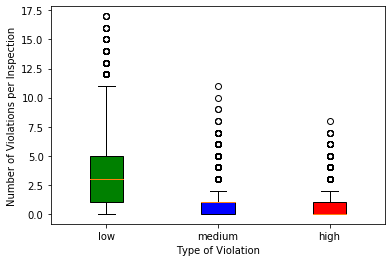

In [6]:
bplt = plt.boxplot(data[['low', 'medium', 'high']].T, vert=True, labels=[
                   'low', 'medium', 'high'], patch_artist=True)
colors = ['green', 'blue', 'red']
for patch, color in zip(bplt['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel("Number of Violations per Inspection")
plt.xlabel("Type of Violation")
plt.show()

We see that the number of low violation per inspection is more spread out than that of medium and high violations. Also, the number of low violations found in an inspection can be larger than that of medium and high violations. We also notice that more than 50% of the number of high violations is zero, which means that they are less common than the other two types of violations. We can further check how common each type of violation is, by computing their non-zero percentage.  

In [7]:
print("Percentage of non-zero low violations:",
      100*len(data[data.low > 0])/len(data))
print("Percentage of non-zero medium violations:",
      100*len(data[data.medium > 0])/len(data))
print("Percentage of non-zero high violations:",
      100*len(data[data.high > 0])/len(data))

Percentage of non-zero low violations: 87.09115646258503
Percentage of non-zero medium violations: 53.289795918367346
Percentage of non-zero high violations: 39.57006802721089


*How are violations changing over time?*

Let us now check the evolution of the number of each violation type with time, to see if there is an increase or decrease in their occurrence.

We count the average number of each type of violation for each month across the years.

In [8]:
# Count the number of violations for each month
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'])
hist = data[['inspect_dt', 'low', 'medium', 'high']]
hist = hist.assign(inspect_my=hist['inspect_dt'].apply(
    lambda x: pd.to_datetime(str(datetime.date(x.year, x.month, 1)))))
trend = hist.groupby(["inspect_my"])[['low', 'medium', 'high']].mean()

We then plot the evolution of the average number of violations.

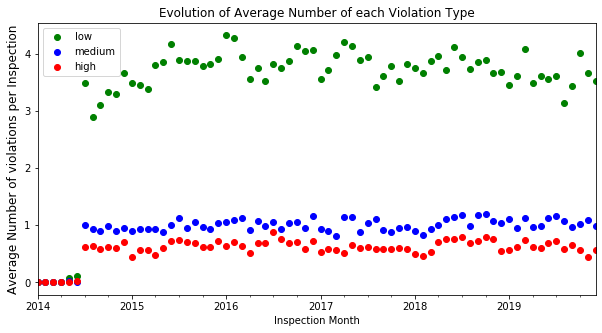

In [9]:
trend.plot(figsize=(10, 5), color=[
           'green', 'blue', 'red'], marker='o', linestyle='')
plt.ylabel('Average Number of violations per Inspection', fontsize=12)
plt.xlabel('Inspection Month')
plt.title('Evolution of Average Number of each Violation Type')
plt.show()

We see that on average the number of each type of violations is not decreasing with time, which implies the importance of doing regular inspections for the food facilities and restaurants. 

# Place Description for each Violation Type

The column 'description' provides a brief description of the facility inspected. More specifically, it specifies whether the inspected place is a restaurant, supermarket or convenience store, and whether it belongs to a chain and if it provides liquor. We now check in which places each type of violation occur more.

Since each restaurant can be inspected many times, we compute first the average of each type of violations for each restaurant.

In [10]:
description_data = data[["description", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "description"])['low', 'medium', 'high'].mean().reset_index()

Now, for each place category indicated by the description column, we compute the average and maximum number of each violation type detected per inspection.

In [11]:
desc_mean = description_data.groupby(["description"])[
    ['low', 'medium', 'high']].mean().reset_index()
desc_max = description_data.groupby(["description"])[
    ['low', 'medium', 'high']].max().reset_index()
description = desc_mean.merge(
    desc_max, on='description', suffixes=['_mean', '_max'])

We now visualize the obtained averages and maximum values for each place type. We first shorten some of the names of places (of column 'description'), because we will use them to annotate the points on the plots.

In [12]:
description['description'] = description.description.apply(
    lambda s: s.replace('Restaurant', "Rest."))
description['description'] = description.description.apply(
    lambda s: s.replace('Retail/Convenience', 'Retail'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Nursing Home/Personal Care Comb.', 'Nursing Home'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Kitchen', 'Kit.'))

To make the visualization clearer to read, we provide a separate plot for each violation type. In each plot, we plot the average number of violations vs the maximum number of violations for each place category.

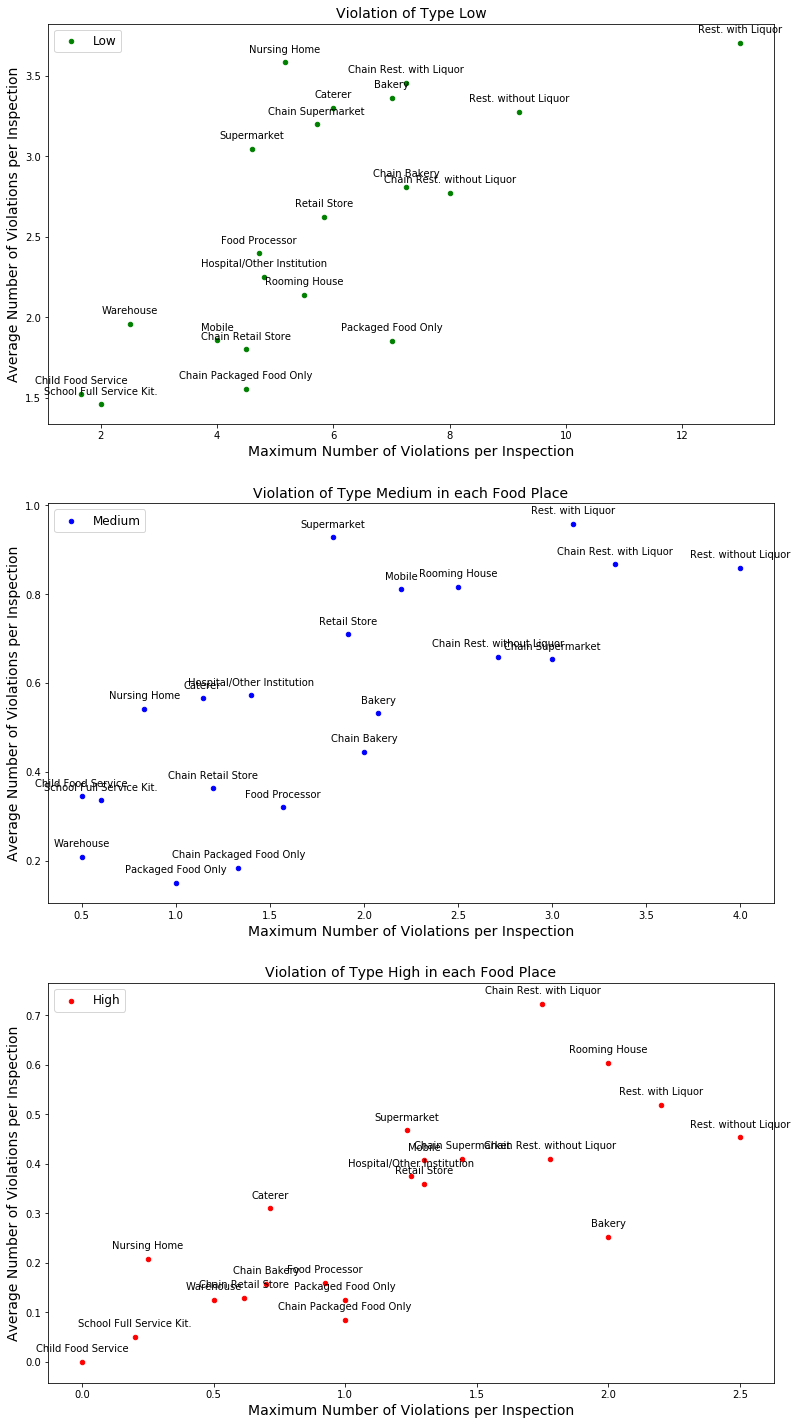

In [13]:
plot_mean_max(description, 'description', figsize=(13,25))

In the above plots, the less clean food facilities appear in the upper right corner of the plot and the cleaner facilities appear in the lower left corner of the plot. We notice that for all violation types, the high numbers of violations are mainly detected in restaurants. On the other hand, cleaner places are those that provide child food or packaged foods or those that are inside a school or a warehouse. Moreover, we notice that "rooming house" and mobile restaurants are places with large number of medium violations, and that "rooming house" are places with large number of high violations.

## Violation in Chain/Non-Chain Places

We now zoom into the chain and non chain places, to check if this characteristic can be associated with the type of violation.

We first extract the places that belong to a chain and those that do not belong. We then add an indicator column that specifies this characteristic. 

In [14]:
non_chain = ['Bakery', 'Packaged Food Only', 'Restaurant with Liquor',
             'Restaurant without Liquor',
             'Retail/Convenience Store', 'Supermarket']
chain = ['Chain Bakery', 'Chain Packaged Food Only', 'Chain Restaurant with Liquor',
         'Chain Restaurant without Liquor', 'Chain Retail/Convenience Store',
         'Chain Supermarket']
chain_data = description_data[['description', 'low', 'medium', 'high']]
chains = chain_data['description'].apply(lambda s: 'True' if s in chain else 'False')
chain_data = chain_data.assign(chain=chains)
chain_data = chain_data[((chain_data.description.isin(chain)) |
                     (chain_data.description.isin(non_chain)))]

We then plot the violin plots for each type of violation and then compare them between the chain and non-chain places.

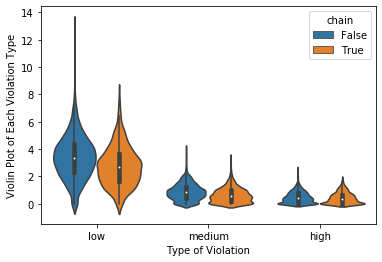

In [15]:
chain_data_melted = chain_data.melt(['description', 'chain'],
                         var_name='violation', value_name='number')
sns.violinplot(data= chain_data_melted, x='violation',y='number',hue='chain')
plt.xlabel('Type of Violation')
plt.ylabel('Violin Plot of Each Violation Type')
plt.show()

We see that the highest number of violations for each type occurred in non-chain places and that the distribution of each type of violation is more spread out for non-chain places. We also notice that the medians are slightly higher for non-chain places. This might be because chain restaurants have to follow strict corporates standards.

# Restaurant's Age and Violation Type 

For each restaurant, the business starting date is given in the column "bus_st_date". From this column, we can find the age of the restaurant on the inspection day. Let us check if the fact that the restaurant is new or old can help in predicting the violation type.

We first compute the age (in years) at the inspection by subtracting the entries of column "bus_st_date" from the column "inspect_dt" (inspection date).

In [16]:
age_data = data[['inspect_dt','bus_st_date','low','medium','high']]
age_data = age_data[age_data.bus_st_date != 'none']
age_data['age'] = (pd.to_datetime(age_data['inspect_dt']) -
              pd.to_datetime(age_data['bus_st_date'])).apply(lambda x: x.days/365)

We then plot the number of each violation type with respect to the age of the restaurant (in years).

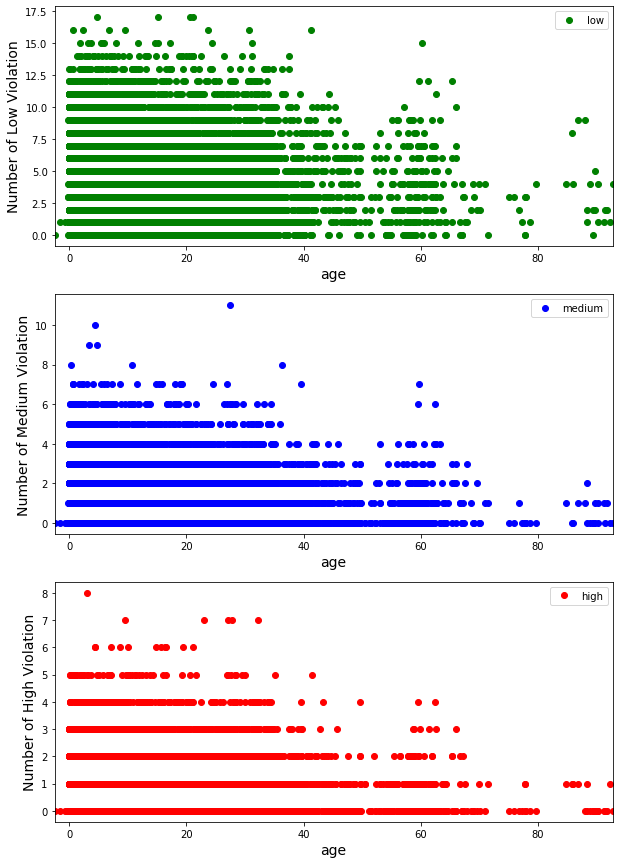

In [17]:
plot_scatter(age_data, 'age', figsize=(10,15))

We mainly notice that the highest number of low, medium and high violations did not occur in very old restaurants (> 60 years). Also as the number of violation increases, the maximum age of the restaurant at which this number of violation was found decreases. This might be because old restaurants are more experienced and aware of the regulations, or they follow more rigorously the regulations to maintain their reputation. 
However, for restaurants with less than 40 years old, we see all range of violations number possible.

# Star Reviews and Violation

Based on the reviews, each restaurant in Yelp is assigned some number of stars (from 1 to 5). Let us check how each category of these restaurants performs during inspection. Do 5-star review restaurant make less violation? Do restaurants that people like abide more by the regulations or do they still make violations?

To answer those questions, let us plot the violin plot of each violation type for each restaurant star category.

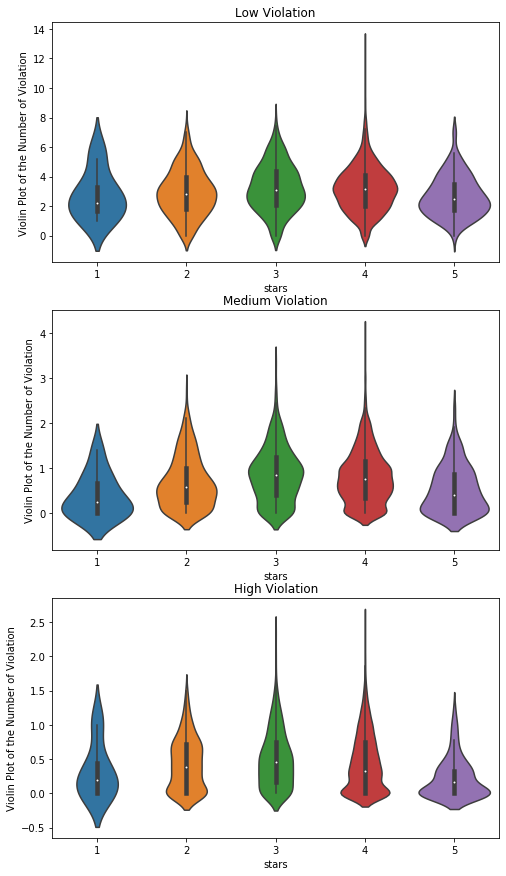

In [18]:
stars_data = data[["stars", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "stars"])['low', 'medium', 'high'].mean().reset_index()
stars_data['stars'] = stars_data['stars'].apply(round)

plot_violin(stars_data, 'stars', figsize=(8, 15))

We see that all category of restaurant make low, medium and high violations, even a 5-star review restaurant. Even if a restaurant is liked by its customers, it can still make violations. However, we see that greater number of medium and high violations happened with 2-star, 3-star and 4-star restaurants. For 5-star restaurant, the distribution of any type of violation is more skewed to the left, i.e., the majority of violations for 5-star review restaurants are low in number or close to zero. Note that for 1-star restaurants, we see a lower range in the number of violations detected because the number of 1-star restaurants is much lower than the other categories.

In [20]:
stars_data.stars.value_counts()

4    1704
3     402
2     326
5     114
1      11
Name: stars, dtype: int64

# Reviews Counts and Violations

Let us now check if there is any association between the popularity of a restaurant and the violations detected during its inspection. Yelp provides the total number reviews for each restaurant, which can be associated with its popularity. Let us plot the number of each type of violation with respect to the total number of reviews for each restaurant.

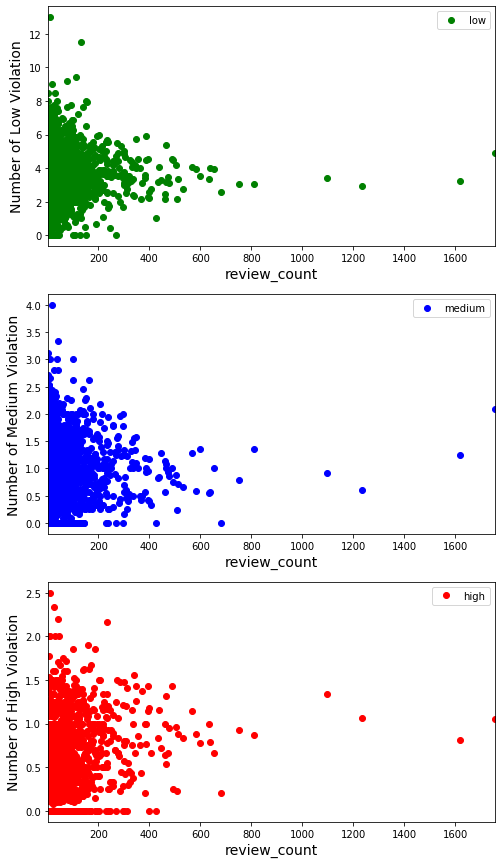

In [21]:
rcount_data = data[["review_count", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "review_count"])['low', 'medium', 'high'].mean().reset_index()

plot_scatter(rcount_data,'review_count', figsize=(8, 15))

We notice that no matter how many review counts each restaurant has, it can make low, medium and high violations. More specifically, for restaurants with review counts less than 200, we see that the number of each type of violations is spread across all its possible values. Moreover, the highest numbers of any type of violation were made by restaurants with low review counts.

# Violations by Zip Codes

We now look at the distribution of each type of violations on the map of zip codes of Allegheny County. This can help us identify if there is any neighborhood where low, medium or high violations mostly occur.

We load the geojson file of the zip codes of Allegheny county, downloaded from this [website](https://catalog.data.gov/dataset/allegheny-county-zip-code-boundaries-9a066/resource/dc0578b7-ecfd-49ee-94b6-c6ba953a92c5).

In [22]:
dfc = gpd.read_file('Boundaries.geojson')

For each zip code, we find the mean of low, medium and high violations.

In [23]:
places = data[["zip","low",'medium','high']]
places = places.groupby("zip").mean().reset_index()
places['zip'] = places.zip.astype('int')
dfc['ZIP'] = dfc.ZIP.astype('int')

In [24]:
dfc = dfc.merge(places,left_on="ZIP",right_on="zip")

We now plot the choropleth map for low violations.

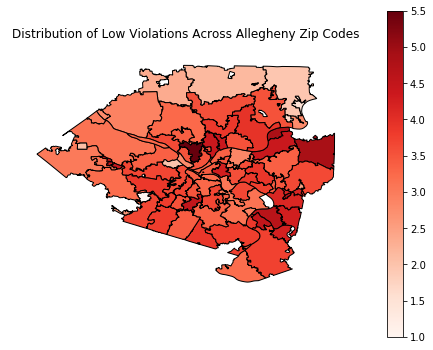

In [25]:
ax = gplt.choropleth(dfc, hue='low', cmap='Reds', legend=True)
ax.set_title("Distribution of Low Violations Across Allegheny Zip Codes")
plt.show()

We now plot the choropleth map of medium violations.

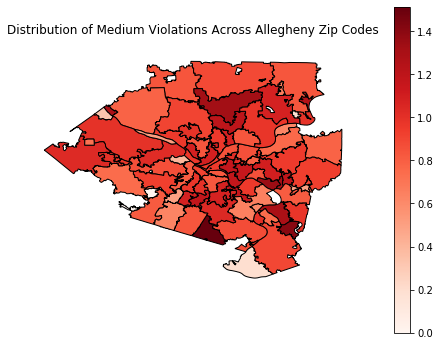

In [26]:
ax = gplt.choropleth(dfc, hue='medium', cmap='Reds', legend=True)
ax.set_title("Distribution of Medium Violations Across Allegheny Zip Codes")
plt.show()

We now plot the choropleth map of high violations.

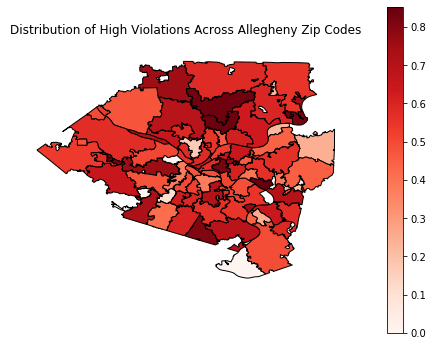

In [27]:
ax = gplt.choropleth(dfc, hue='high', cmap='Reds', legend=True)
ax.set_title("Distribution of High Violations Across Allegheny Zip Codes")
plt.show()

We notice that for the zipcode corresponding to the city of Pittsburgh, low violations were mostly concentrated, however for the same city, medium and high violations were less than those of other cities. Moreover, medium and high violations were more concentrated in the central north parts of Allegheny county and a place in the central south part. We can check the names of the top 5 neighborhoods in the number of violations.

In [28]:
dfc.sort_values('low',ascending=False).NAME.head(5)

85          PITTSBURGH
6           PITTSBURGH
19             OAKMONT
9     EAST MC KEESPORT
11          MCKEESPORT
Name: NAME, dtype: object

In [29]:
dfc.sort_values('medium',ascending=False).NAME.head(5)

32         SOUTH PARK
57         MCKEESPORT
27           BRADDOCK
43       ALLISON PARK
74    EAST PITTSBURGH
Name: NAME, dtype: object

In [30]:
dfc.sort_values('high',ascending=False).NAME.head(5)

27        BRADDOCK
54        GLENSHAW
43    ALLISON PARK
82         HARWICK
72      PITTSBURGH
Name: NAME, dtype: object

It would be interesting to check the economical and social conditions of each of these neighborhoods and link them to the type of violations observed.

# Violations and Yelp Attributes

Yelp dataset provides different attributes for each restaurant. We focus on three of these attributes: alcohol (whether the restaurant provides alcohol or not), good for kids, and the price range, and examine their association with the violation detected.

## Alcohol

Does serving alcohol have any association with the hygiene practices of the restaurant? Let us first check this Yelp category and check its entries.

In [31]:
print(data.alcohol.unique())

["u'beer_and_wine'" "u'full_bar'" 'unknown' "u'none'" "'none'"
 "'full_bar'" "'beer_and_wine'" 'None']


We then map each of these entries to either 0 or 1, where 0 means "no alcohol served" and 1 means "alcohol served".

In [32]:
data.alcohol.replace(['u\'none\'','\'none\'','None'],'False',inplace=True)
data.alcohol.replace(["u'beer_and_wine'", "u'full_bar'","'full_bar'",
       "'beer_and_wine'"],'True',inplace=True)

In [33]:
data.alcohol.value_counts()

False      6998
True       6446
unknown    4931
Name: alcohol, dtype: int64

We now check th distribution of each type of violation.

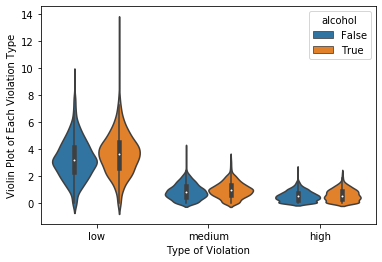

In [34]:
alcohol_data = data[data.alcohol != 'unknown']
alcohol_data = alcohol_data[["alcohol", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "alcohol"])['low', 'medium', 'high'].mean().reset_index()
alcohol_data_melted = alcohol_data.melt(['id', 'alcohol'],
                                        var_name='violation', value_name='number')
sns.violinplot(data=alcohol_data_melted, x='violation',
               y='number', hue='alcohol')
plt.xlabel('Type of Violation')
plt.ylabel('Violin Plot of Each Violation Type')
plt.show()

We see some slight differences in the distribution of violation numbers between alcohol and non-alcohol places. Note that for low type of violations, we see that the the number of violations is more spread out in places that serve alcohol.

## Good For Kids

We now check if restaurants that are good for kids follow well the regulations.

We check first its entries.

In [35]:
data.good_for_kids.value_counts()

True       11186
unknown     4341
False       2848
Name: good_for_kids, dtype: int64

We now plot the violin plots of each violation.

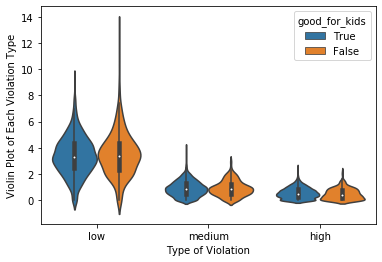

In [36]:
kids_data = data[data.good_for_kids != 'unknown']
kids_data = kids_data[["good_for_kids", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "good_for_kids"])['low', 'medium', 'high'].mean().reset_index()
kids_data_melted = kids_data.melt(['id', 'good_for_kids'],
                                  var_name='violation', value_name='number')
sns.violinplot(data=kids_data_melted, x='violation',
               y='number', hue='good_for_kids')
plt.xlabel('Type of Violation')
plt.ylabel('Violin Plot of Each Violation Type')
plt.show()

We do not notice a lot of difference between the distributions of violations for this category. However, for low violation, we see higher number of violations in restaurants that are not good for kids.

## Price Range

Yelp also provides the price range for some restaurants. It is interesting now to check if expensive restaurants makes less violations or not.

We check first the entries of price range category.

In [37]:
data.price_range.value_counts()

2          9104
1          6992
unknown    1658
3           550
4            64
None          7
Name: price_range, dtype: int64

We combine the 3 and 4 dollars sign restaurants into one group: "+3".

In [38]:
data.at[data.price_range.isin(['3','4']),'price_range']='+3'

We now plot the distribution of each violation for each price range.

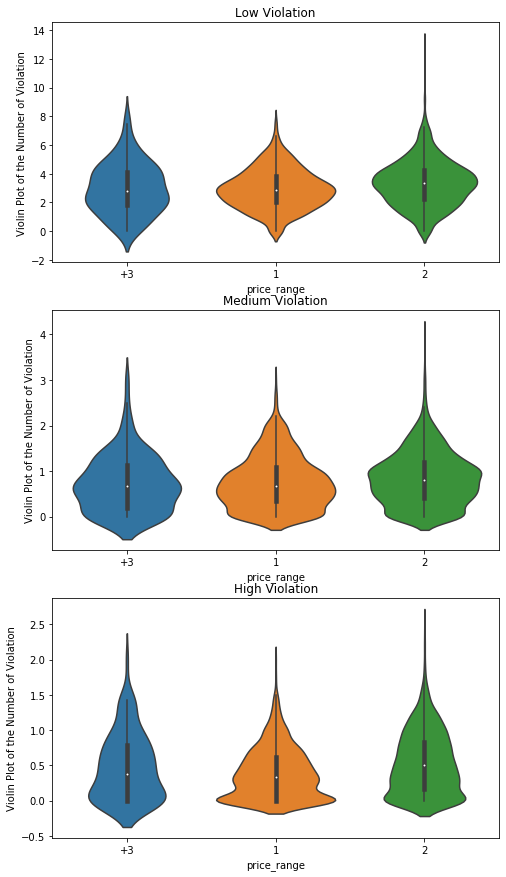

In [39]:
price_data = data[(data.price_range != 'unknown')
                   & (data.price_range != 'None')]
price_data = price_data[["price_range", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "price_range"])['low', 'medium', 'high'].mean().reset_index()

plot_violin(price_data,'price_range', figsize=(8, 15))

What is interesting to note from the above violin plots, is that expensive restaurants with more than 3 dollars sign do make violations of all types, especially with high violations, their distribution is as spread out as the other restaurants categories. 

# Violations and Yelp Categories

Other than attributes, Yelp also provides a set of categories for each restaurant that identify the type of cuisine, any specialty food served and some more characteristic of the inspected place. 

## Cuisine

Do certain cuisines make restaurants more prone to make violations in food handling? Let us check the number of violations for each cuisine type.

We first form a column for each cuisine that identifies if the cuisine is served or not in the restaurant. We are doing so because restaurants can serve multiple cuisines.

In [40]:
cuisines = ["American", "Italian", "French", "Mediterranean", 
            "Spanish", "European", "Mexican", "Latin American", 
            "African", "Caribbean", "Southern", "Japanese", 
            "Chinese", "E Asian", "N/C Asian","SE Asian", "Indian", 
            "Australian"]

for csn in cuisines:
    data[csn] = 'False'
    
for index, row in data.iterrows():
    if (len(eval(row.cuisine))==0):
        for csn in cuisines:
            data.at[index,csn] = 'None'
    else:
        for csn in eval(row.cuisine):
            data.at[index,csn] = 'True'

We then find the mean and maximum number of violations that occurred in each type of cuisine.

In [41]:
cu = pd.DataFrame()
for csn in cuisines:
    subset_data = data[['id', csn, 'low', 'medium', 'high']].groupby(['id', csn])[
        'low', 'medium', 'high'].mean().reset_index()
    cu = cu.append(subset_data[[csn, 'low', 'medium', 'high']].groupby(
        csn).agg([np.mean,max]).loc['True'])
cu = cu.assign(cuisine = cuisines)

In [42]:
cu.columns = ['low_mean','low_max','medium_mean','medium_max','high_mean',
              'high_max','cuisine']

We plot the results for each type of violation.

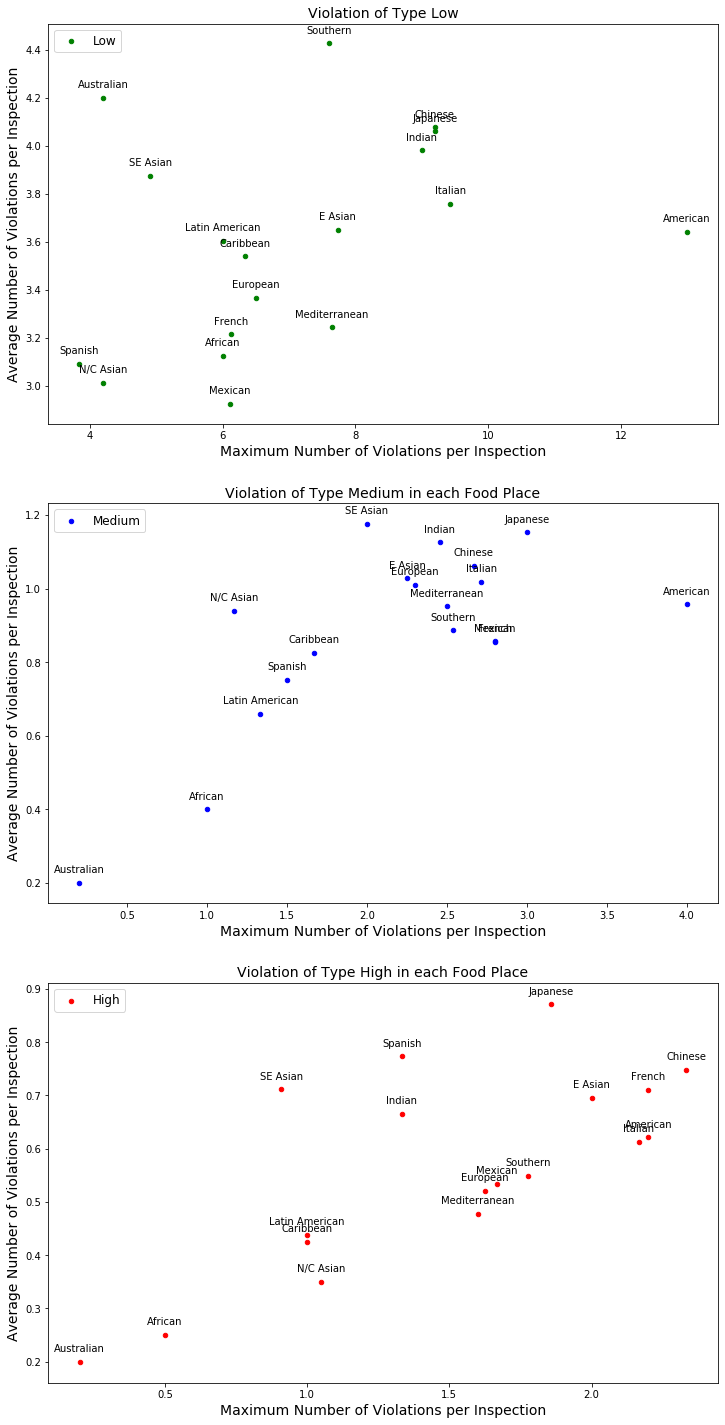

In [43]:
plot_mean_max(cu, 'cuisine',figsize=(12,25)) 

We mainly see that for any type of violation, the following two cuisines: Japanese and Chinese have both high average number of violations and maximum number of violations. We also have the Southern cuisine for low violations.

## Special Food

Each restaurant might be specialized in some type of food: pizza, fast food, sushi, etc.,... If a restaurant serves some  type of food, can this specialization make the restaurant more likely to make a violation?

Let us first form a column for each special food that identifies if the specific food is served or not in the restaurant. 

In [44]:
foods = ["Pizza", "Fast/Fried Foods", "Burgers", "Dessert", 
         "Bagels/Pretzels", "Gelato", "Seafood", "BBQ", "Steaks", 
         "Vegetarian", "Vegan", "Gluten-Free", "Noodles", "Tacos",
         "Sandwiches", "Sushi", "Kosher", "Fruit/Veg", "Other"]

for fd in foods:
    data[fd] = 'False'
    
for index, row in data.iterrows():
    if (len(eval(row.special_food))==0):
        for fd in foods:
            data.at[index,fd] = 'None'
    else:
        for fd in eval(row.special_food):
            data.at[index,fd] = 'True'

We then find the mean and maximum number of violations for each specialized restaurant.

In [45]:
fo = pd.DataFrame()
for fd in foods:
    subset_data = data[['id', fd, 'low', 'medium', 'high']].groupby(['id', fd])[
        'low', 'medium', 'high'].mean().reset_index()
    fo = fo.append(subset_data[[fd, 'low', 'medium', 'high']].groupby(
            fd).agg([np.mean,max]).loc['True'])
    
fo = fo.assign(specialty_food = foods)

In [46]:
fo.columns = ['low_mean','low_max','medium_mean','medium_max','high_mean',
              'high_max','specialty_food']

We plot the obtained results.

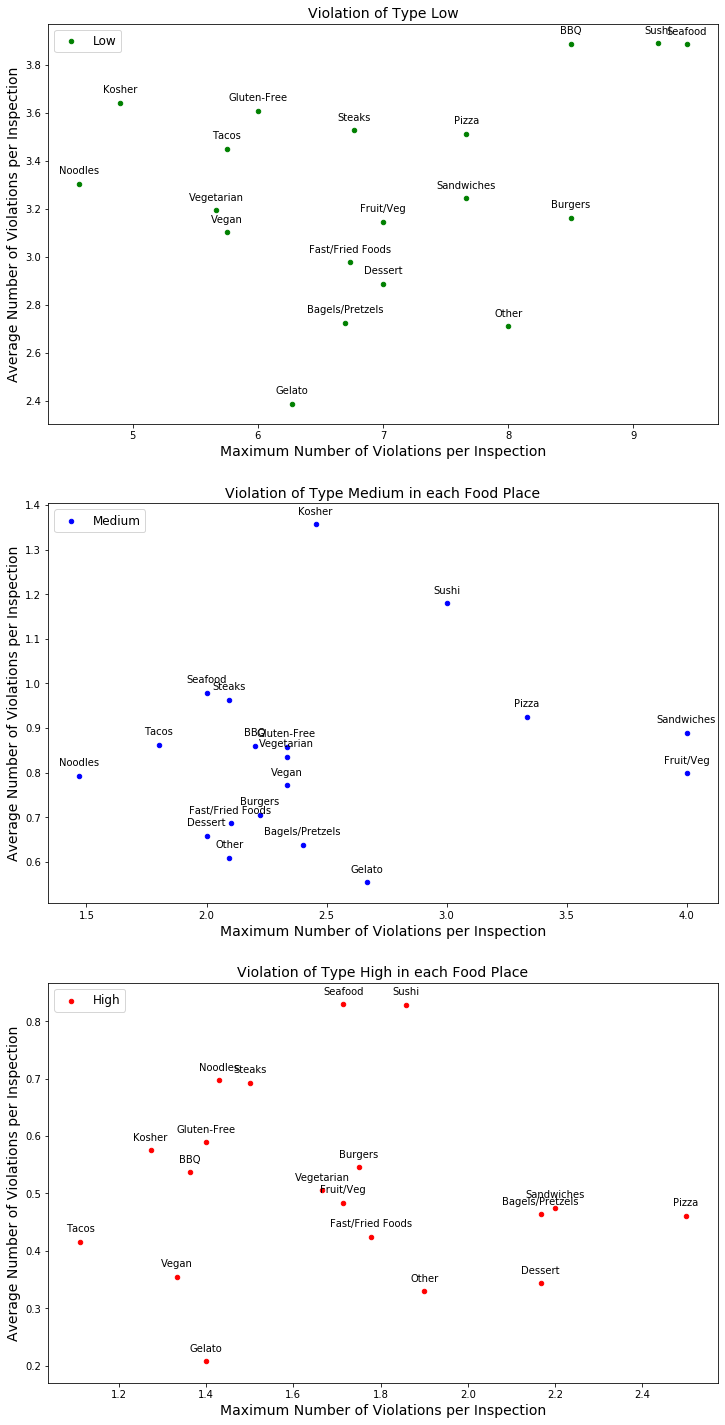

In [47]:
plot_mean_max(fo,'specialty_food',figsize=(12,25))

We see that for low and high violations, places that serve Sushi and Seafood have high average number of violations or high maximum number of violations. Sushi and Seafood places involve raw fish, whose wrong handling make the restaurants more prone to make violations. On the other hand, for medium violations, we have places that serve Sushi and Kosher. We also notice that Pizza places have relatively high maximum or mean number of violation, for medium and high violations. 

## Place

This category provides more characteristics of the place inspected, which might not only be a restaurant. It can also be a food shop, bakery or grocery shop.

We form a column for each possible type of place.

In [48]:
places = ["Restaurants", "Mobile", "Convenience Store", "Grocery Store",
          "Food Shop", "Bakeries", "Coffee Place", "Other Goods",
          "Shopping", "Services", "Entertainment/Event Place", 
          "Fitness/Sport Place",
          "Teaching/School Place", "Religious Place",
          "Health & Medical Place", "Pub/Bars", "Liquor Manufacturing"]

for pl in places:
    data[pl] = 'False'
    
for index, row in data.iterrows():
    if (len(eval(row.place))==0):
        for pl in places:
            data.at[index,pl] = 'None'
    else:
        for pl in eval(row.place):
            data.at[index,pl] = 'True'

We then compute the average and maximum number of violations for each type of place.

In [49]:
place = pd.DataFrame()
for pl in places:
    subset_data = data[['id', pl, 'low', 'medium', 'high']].groupby(['id', pl])[
        'low', 'medium', 'high'].mean().reset_index()
    place = place.append(subset_data[[pl, 'low', 'medium', 'high']].groupby(
            pl).agg([np.mean,max]).loc['True'])
    
place = place.assign(place = places)

In [50]:
place.columns = ['low_mean','low_max','medium_mean','medium_max','high_mean',
              'high_max','place']

We finally plot the results.

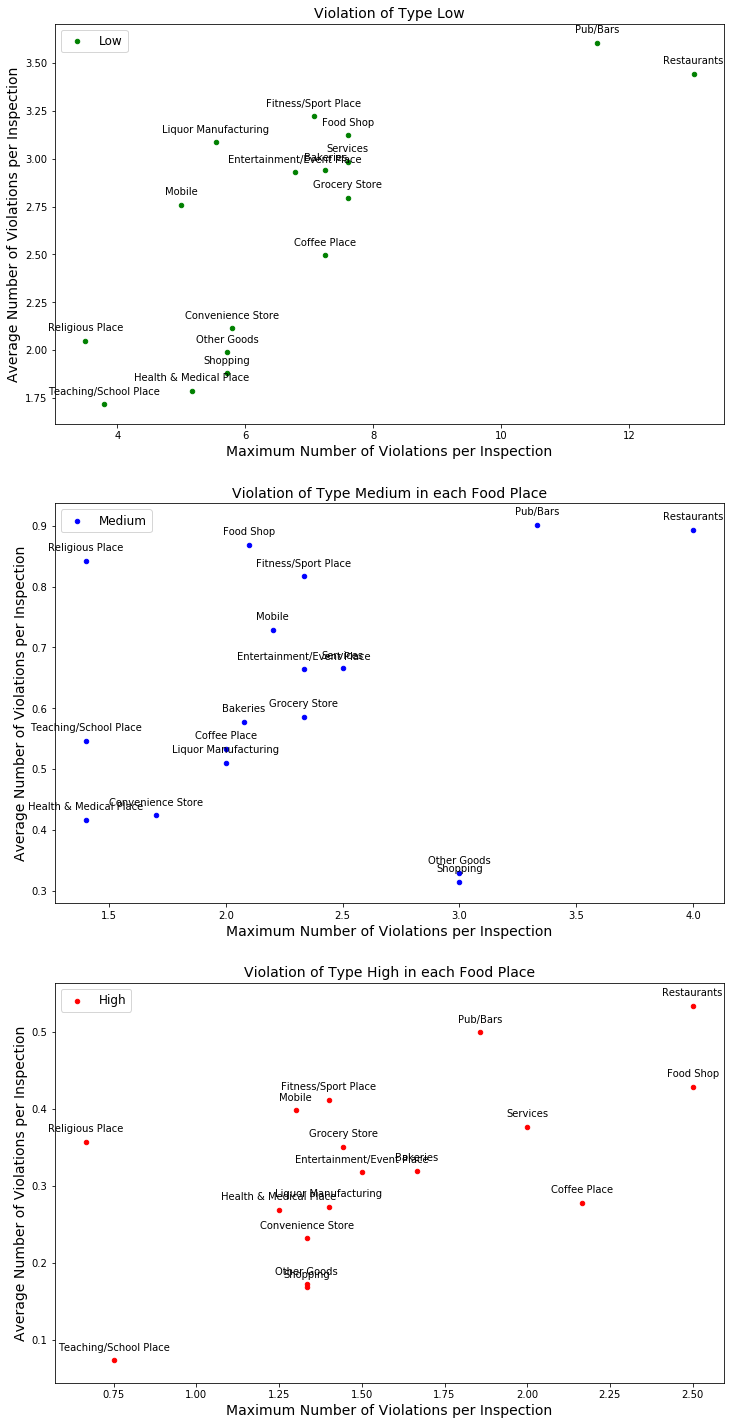

In [51]:
plot_mean_max(place,'place',figsize=(12,25))

Similar to what we previously obtained with the description column, restaurants are the most places where the highest values of violations occurred. On the other hand, violations occur less in "Teaching/School Place". Note that food shop have a high value for the maximum number of violations, this might be because food shops include meat shops.

# Statistical Significance of the Observed Differences

We visualized so far the number of low, medium and high violations with respect to the different features of the inspected places. Three of these features are numerical (Age, review counts) and the remaining are categorical (star reviews, place description, attributes: alcohol, good for kids, price range and Yelp Categories). We now statistically examine the relationship between the violation and these features. 

## Categorical Features

Each categorical feature consists of many categories or groups. We would like to statically examine if there is any difference in the number of each type of violation between the groups. For this sake, we can perform here the ANOVA (one-way analysis of variance) technique, which compares between the means of each group. More specifically, it tests the null hypothesis, which states that the samples in all groups are drawn from populations with the same mean value, against the alternate hypothesis, which states that the samples are drawn from populations with different means (not all means should be different, there are at least two groups drawn from populations with different means). The statistic computed in this test is the F-statistic, which is the ratio of the variance of the means to the variance of the samples within each group. A higher ratio implies that the samples are drawn from population with different means. However, to perform this test, three assumptions should be met; the samples are independent, drawn from populations with same variance, and the residuals are normally distributed. Since the equal variance assumption is not guaranteed in our data, we are going to use a variation to this test, namely, Welch Anova, which adjusts the F statistic to reduce the effect of unequal variances. To perform this test, we use the welch_anova function from the package 'pingouin'. 

We first start with the columns: description, stars reviews, alcohol, good for kids and price range. 

In [52]:
for viol in ['low', 'medium', 'high']:
    results = []
    print(viol.upper(), 'VIOLATION')
    res = welch_anova(dv=viol, between='description', data=description_data)
    results.append([float(res['F']), float(res['p-unc'])])

    res = welch_anova(dv=viol, between='stars', data=stars_data)
    results.append([float(res['F']), float(res['p-unc'])])

    res = welch_anova(dv=viol, between='alcohol', data=alcohol_data)
    results.append([float(res['F']), float(res['p-unc'])])

    res = welch_anova(dv=viol, between='good_for_kids', data=kids_data)
    results.append([float(res['F']), float(res['p-unc'])])

    res = welch_anova(dv=viol, between='price_range', data=price_data)
    results.append([float(res['F']), float(res['p-unc'])])

    print(pd.DataFrame(results, columns=['F', 'p-unc'],
                       index=['Description', 'Stars', 'Alcohol',
                              'Good For Kids', 'Price Range']))
    print('\n')

LOW VIOLATION
                    F         p-unc
Description    37.165  7.134733e-25
Stars           5.288  8.640705e-04
Alcohol        26.694  2.698304e-07
Good For Kids   1.813  1.787425e-01
Price Range    18.790  2.389507e-08


MEDIUM VIOLATION
                    F         p-unc
Description    30.887  2.377367e-22
Stars          12.326  1.080220e-07
Alcohol        13.673  2.251784e-04
Good For Kids   0.062  8.041337e-01
Price Range     6.298  2.128822e-03


HIGH VIOLATION
                     F         p-unc
Description    140.398  7.099921e-45
Stars           17.151  6.206981e-10
Alcohol         15.637  8.035410e-05
Good For Kids    8.087  4.610879e-03
Price Range     32.993  1.696666e-13




We see that all features show statistically significant differences in the number of violations between its different categories, except for the attribute "Good For Kids" with low and medium violations. 

Now for the remaining columns that specify the cuisine, any special food and place characteristic, we only search for columns that show statistically significant differences for each type of violations. 

*Cuisine*

In [53]:
for viol in ['low', 'medium', 'high']:
    results = []
    print(viol.upper(), 'VIOLATION')
    for csn in cuisines:
        subset_data = data[['id', csn, 'low', 'medium', 'high']].groupby(['id', csn])[
        'low', 'medium', 'high'].mean().reset_index()
        subset_data = subset_data[subset_data[csn]!= 'None']
        res = welch_anova(dv=viol,between=csn,data=subset_data)
        if (float(res['p-unc'])<0.05):
            results.append(csn)
    print(results)

LOW VIOLATION


C:\Users\User\Anaconda3\lib\site-packages\pingouin\parametric.py:1295: RuntimeWarning: divide by zero encountered in double_scalars
  pval = f.sf(fval, ddof1, 1 / lamb)
C:\Users\User\Anaconda3\lib\site-packages\pingouin\parametric.py:1300: RuntimeWarning: divide by zero encountered in double_scalars
  'ddof2': 1 / lamb,


['Mediterranean', 'Mexican', 'Southern', 'Japanese', 'Chinese']
MEDIUM VIOLATION
['Latin American', 'Japanese', 'Chinese']
HIGH VIOLATION
['Mediterranean', 'Mexican', 'Latin American', 'Japanese', 'Chinese']


*Special Food*

In [54]:
for viol in ['low', 'medium', 'high']:
    results = []
    print(viol.upper(), 'VIOLATION')
    for fd in foods:
        subset_data = data[['id', fd, 'low', 'medium', 'high']].groupby(['id', fd])[
        'low', 'medium', 'high'].mean().reset_index()
        subset_data = subset_data[subset_data[fd]!= 'None']
        res = welch_anova(dv=viol,between=fd,data=subset_data)
        if (float(res['p-unc'])<0.05):
            results.append(fd)
    print(results)

LOW VIOLATION
['Pizza', 'Fast/Fried Foods', 'Dessert', 'Bagels/Pretzels', 'Gelato', 'Seafood', 'BBQ', 'Sushi', 'Other']
MEDIUM VIOLATION
['Pizza', 'Fast/Fried Foods', 'Burgers', 'Dessert', 'Bagels/Pretzels', 'Gelato', 'Seafood', 'Sandwiches', 'Sushi', 'Kosher', 'Other']
HIGH VIOLATION
['Fast/Fried Foods', 'Burgers', 'Dessert', 'Gelato', 'Seafood', 'Steaks', 'Noodles', 'Sushi', 'Other']


*Place*

In [55]:
for viol in ['low', 'medium', 'high']:
    results = []
    print(viol.upper(), 'VIOLATION')
    for pl in places:
        subset_data = data[['id', pl, 'low', 'medium', 'high']].groupby(['id', pl])[
        'low', 'medium', 'high'].mean().reset_index()
        subset_data = subset_data[subset_data[pl]!= 'None']
        res = welch_anova(dv=viol,between=pl,data=subset_data)
        if (float(res['p-unc'])<0.05):
            results.append(pl)
    print(results)

LOW VIOLATION
['Restaurants', 'Convenience Store', 'Grocery Store', 'Coffee Place', 'Other Goods', 'Shopping', 'Services', 'Entertainment/Event Place', 'Teaching/School Place', 'Religious Place', 'Health & Medical Place', 'Pub/Bars']
MEDIUM VIOLATION
['Restaurants', 'Convenience Store', 'Grocery Store', 'Food Shop', 'Bakeries', 'Coffee Place', 'Other Goods', 'Shopping', 'Services', 'Entertainment/Event Place', 'Health & Medical Place', 'Pub/Bars', 'Liquor Manufacturing']
HIGH VIOLATION
['Restaurants', 'Convenience Store', 'Grocery Store', 'Bakeries', 'Coffee Place', 'Other Goods', 'Shopping', 'Services', 'Entertainment/Event Place', 'Teaching/School Place', 'Pub/Bars', 'Liquor Manufacturing']


## Numerical Features

We know statistically examine the association between the number of each type of violation and the two numerical features: review counts, and age. For this sake, we compute the Spearman correlation for each feature. This measure varies between -1 and +1 with 0 implying no correlation and accounts for non-linear relationship.

In [56]:
for viol in ['low','medium','high']:
    results = []
    print(viol.upper(),'VIOLATION')
    res = spearmanr(age_data[viol],age_data.age)
    results.append([res.correlation, res.pvalue])
    res = spearmanr(rcount_data[viol],rcount_data.review_count)
    results.append([res.correlation, res.pvalue])
    print(pd.DataFrame(results, columns=['Correlation','P-value'],
                       index=['Age','Review Counts']))
    print('\n')

LOW VIOLATION
               Correlation       P-value
Age               0.048480  4.902831e-11
Review Counts     0.221187  1.048041e-29


MEDIUM VIOLATION
               Correlation       P-value
Age               0.037367  4.067571e-07
Review Counts     0.234422  2.928156e-33


HIGH VIOLATION
               Correlation       P-value
Age               0.034441  3.029025e-06
Review Counts     0.362178  4.222156e-80




We see that the feature 'review counts' has stronger association with each type of violation than that of the feature 'age'.

# Do restaurants do better than from the last inspection?

How each violation is changing from one inspection to another for each restaurant? Do they tend to decrease or increase? To answer these questions, we first find, for each restaurant, the difference in the number of violation between the current inspection and the previous inspection and then plot a histogram for the differences.

In [57]:
hist_vio = data[['inspect_dt','id','low','medium','high']]
hist_vio = hist_vio.sort_values("inspect_dt").groupby('id')
hist_vio = hist_vio[['low','medium','high']].diff()

*Low Violations*

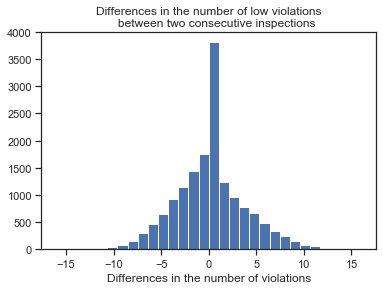

In [58]:
plt.hist(hist_vio['low'].dropna(), bins=30)
plt.title(
    'Differences in the number of low violations\n \
    between two consecutive inspections')
plt.xlabel('Differences in the number of violations')
plt.show()

*Medium Violations*

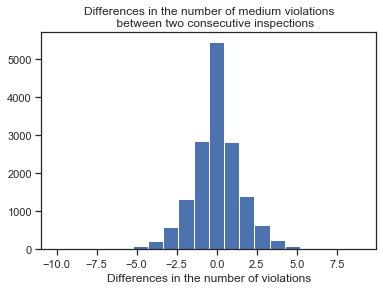

In [59]:
plt.hist(hist_vio['medium'].dropna(), bins=20)
plt.title(
    'Differences in the number of medium violations\n\
    between two consecutive inspections')
plt.xlabel('Differences in the number of violations')
plt.show()

*High Violations*

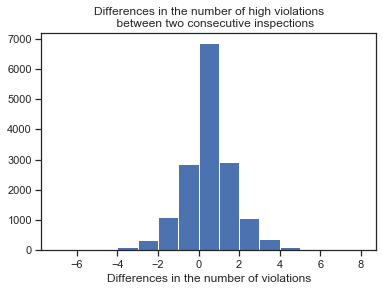

In [60]:
plt.hist(hist_vio['high'].dropna(),bins=15)
plt.title(
    'Differences in the number of high violations\n\
    between two consecutive inspections')
plt.xlabel('Differences in the number of violations')
plt.show()

We notice that for all types of violations, we approximately have equal proportions of negative and positive differences. This means that restaurants do not always improve between two inspections.

# Sentiment Analysis of Text Reviews

We now focus on the text reviews for each restaurant. We first perform sentiment analysis on the text reviews, which assigns a sentiment score for each text review. We then compare this sentiment score with the number of violations detected, to see if positive reviews are associated with clean restaurants or not.

We first load the reviews that we have already processed and cleaned.

In [61]:
reviews = pd.read_csv('rw.csv')
reviews.drop(index=reviews[reviews.clean_text.isnull()].index, inplace=True)

We now assign a sentiment score for each text review using "afinn" library.

In [62]:
af = Afinn()
reviews['sentiment_score'] = reviews.clean_text.apply(af.score)

We then compute the average of sentiment scores of all reviews that were mentioned 6 months before the inspection.

In [63]:
rw = reviews[['business_id','sentiment_score','date']]
rw = rw.assign(date=pd.to_datetime(rw['date']))

subset = data[['encounter', 'inspect_dt',
               'low', 'medium', 'high', 'business_id']]
subset = subset.assign(inspect_dt_prev = subset.inspect_dt.apply(
    lambda s: pd.to_datetime(s)-datetime.timedelta(6*30)))

grouped = subset.merge(rw, on='business_id')

to_choose = (grouped.date < pd.to_datetime(grouped.inspect_dt)) & (
    grouped.date >= grouped.inspect_dt_prev)
grouped = grouped[to_choose]
grouped = grouped.groupby('encounter').sentiment_score.mean().reset_index()
sent_score_data = subset.merge(grouped, on='encounter')

We then plot the scatter plot between the number of each violation type and the sentiment score.

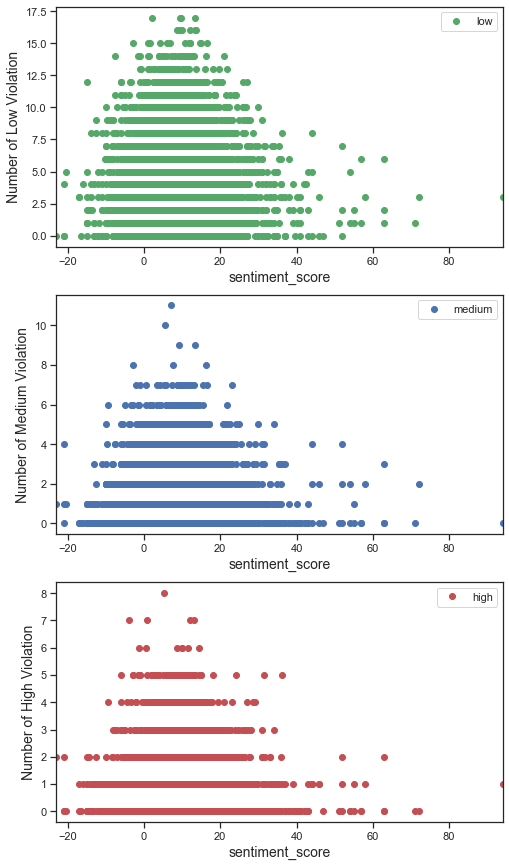

In [64]:
plot_scatter(sent_score_data, 'sentiment_score', figsize=(8,15))

We notice that as the number of violations increases the range of sentiment score decreases and the maximum value in sentiment scores decreases.

To check the statistical significance of the association between the number of violations and sentiment score, we compute the Spearman coefficients.

In [65]:
for viol in ['low','medium','high']:
    results = []
    print(viol.upper(),'VIOLATION')
    res = spearmanr(sent_score_data[viol],sent_score_data.sentiment_score)
    results.append([res.correlation, res.pvalue])
    print(pd.DataFrame(results, columns=['Correlation','P-value'],
                       index=['Sentiment Score']))
    print('\n')

LOW VIOLATION
                 Correlation   P-value
Sentiment Score    -0.025589  0.003989


MEDIUM VIOLATION
                 Correlation   P-value
Sentiment Score    -0.016022  0.071471


HIGH VIOLATION
                 Correlation   P-value
Sentiment Score     0.002626  0.767723




The low values of correlation reflect weak relationship between the sentiment score and number of violations. Also, since the p-values for medium and high violations are greater than 0.05, we fail to reject the null hypothesis, which states that the number of medium or high violations and the sentiment score are uncorrelated.

# Topic Modeling

We now perform topic modeling on the text reviews to check the topics for each type of violations.

In [66]:
rw = reviews[['business_id','date','clean_text']]
rw = rw.assign(date= pd.to_datetime(rw['date']))

We join the texts of all reviews that were mentioned 6 months before each inspection.

In [67]:
grouped = subset.merge(rw, on='business_id')
to_choose = (grouped.date < pd.to_datetime(grouped.inspect_dt)) & (
    grouped.date >= grouped.inspect_dt_prev)
grouped = grouped[to_choose]
grouped = grouped.groupby('encounter')[
    'clean_text'].apply(' '.join).reset_index()
review_data = subset.merge(grouped, on='encounter')

To find the topics, we can either use LDA (Latent Dirichlet Allocation) or NMF (Non-Negative Matrix Factorization). We are going to go with second method (NMF) using the NMF module form sklearn library. 

NMF algorithm takes as input the number of topics and documents (set of reviews in our case) and returns the words that constitute each topic and specifies to which topic each review belongs. This is done by first finding a matrix representation of all reviews, where each row represents one review and each column contains the frequency of each word in the whole set of reviews. This matrix is then decomposed into two smaller matrices, where the first one maps each review to one topic and the second specifies the weight of each word for each topic. 

We first represent the set of all reviews to a bag of words matrix using TfidfVectorizer. We are focusing on the reviews given to places where at least one violation of each type was detected.

In [68]:
no_features = 1000
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=no_features)

tfidf_low = tfidf_vectorizer.fit_transform(review_data[review_data.low>0].clean_text)
tfidf_low_feature_names = tfidf_vectorizer.get_feature_names()

tfidf_med = tfidf_vectorizer.fit_transform(review_data[review_data.medium>0].clean_text)
tfidf_med_feature_names = tfidf_vectorizer.get_feature_names()

tfidf_high = tfidf_vectorizer.fit_transform(review_data[review_data.high>0].clean_text)
tfidf_high_feature_names = tfidf_vectorizer.get_feature_names()

We then decompose each obtained matrix. We choose 5 for the number of topics.

In [69]:
no_topics = 5

# Run NMF
nmf_low = NMF(n_components=no_topics, random_state=1,
          alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_low)
nmf_med = NMF(n_components=no_topics, random_state=1,
          alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_med)
nmf_high = NMF(n_components=no_topics, random_state=1,
          alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_high)

We now display the top 10 words in each topic for each type of vioaltion.

In [70]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
print('Low Violations:')
display_topics(nmf_low, tfidf_low_feature_names, no_top_words)
print('\n')
print('Medium Violations:')
display_topics(nmf_med, tfidf_med_feature_names, no_top_words)
print('\n')
print('High Violations:')
display_topics(nmf_high, tfidf_high_feature_names, no_top_words)

Low Violations:
Topic 0:
not food order get go come good would time service
Topic 1:
pizza order delivery crust good not hoagie slice cheese pepperoni
Topic 2:
sushi chinese roll food thai good chicken rice not noodle
Topic 3:
coffee breakfast shop place sandwich good great not store ice
Topic 4:
beer bar burger wing great good place drink fry food


Medium Violations:
Topic 0:
not food order go get good come would time service
Topic 1:
pizza order delivery crust good not slice cheese hoagie pepperoni
Topic 2:
sushi chinese roll thai food good rice chicken noodle not
Topic 3:
bar beer wing burger great good drink place fry bartender
Topic 4:
coffee breakfast sandwich place good diner great egg pancake shop


High Violations:
Topic 0:
not food get go order good come place would time
Topic 1:
pizza order delivery crust good slice not hoagie cheese pepperoni
Topic 2:
thai chinese food chicken dish noodle not good rice curry
Topic 3:
sushi roll hibachi fish tuna japanese buffet rice chines

We notice some similar topics we found by exploring the cuisine and special food served in each inspected place. For instance, theses topics include food like sushi, chinese, pizza, seafood (fish, tuna, hibachi) and places like bar. 

# Conclusion

By exploring the inspection and violation datasets visually and statistically, we found that the following features: type of place (restaurant, grocery store, service place,..), some of the cuisine served, special food served including Sushi and Seafood are some of the important features to consider in predicting the number of violations. On the other hand, features like 'good_for_kids', age and sentiment score of the reviews provide less insight into the possible types of violations that could be detected. Moreover, we noticed that expensive, popular or highly rated restaurants do make violations of all types. Also, we found that restaurants do not always improve in terms of the number of violations detected, which implies the necessity of doing regular inspections. 